In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/gdrive/MyDrive/Final253_2021(1)/pulsars_train_set.csv', delimiter=',')
test = pd.read_csv('/content/gdrive/MyDrive/Final253_2021(1)/pulsars_test_set.csv', delimiter=',')

In [5]:
train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
3,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
4,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
...,...,...,...,...,...,...,...,...,...
12638,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
12639,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
12640,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
12641,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0


In [6]:
test

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
2,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
3,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
4,138.179688,51.524484,-0.031852,0.046797,6.330268,31.576347,5.155940,26.143310,0
...,...,...,...,...,...,...,...,...,...
5250,89.453125,35.848827,0.731656,3.101474,1.450669,14.204964,11.203558,142.473878,0
5251,127.070312,47.663564,0.006552,-0.123634,0.853679,11.197206,16.122702,296.507738,0
5252,121.375000,53.245158,0.103772,-0.365119,1.095318,12.239976,16.258042,303.880023,0
5253,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0


In [7]:
x_train = np.array(train.drop("target_class" , axis = 1))
x_test = np.array(test.drop("target_class" , axis = 1))

y_train = np.array(train["target_class"])
y_test = np.array(test["target_class"])

In [8]:
import numpy as np
np.random.seed(42)

import tensorflow as tf
tf.random.set_seed(42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, activation = "relu", input_shape = x_train.shape[1:]))
model.add(Dense(500, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile( loss = "binary_crossentropy", metrics = ["accuracy"] ,optimizer = 'adam' )

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 553,401
Trainable params: 553,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
396/396 [==============================] - 5s 4ms/step - loss: 0.5592 - accuracy: 0.9469 - val_loss: 0.0933 - val_accuracy: 0.9732
Epoch 2/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0993 - accuracy: 0.9701 - val_loss: 0.0967 - val_accuracy: 0.9747
Epoch 3/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9760 - val_loss: 0.0898 - val_accuracy: 0.9756
Epoch 4/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9738 - val_loss: 0.0848 - val_accuracy: 0.9762
Epoch 5/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9714 - val_loss: 0.0868 - val_accuracy: 0.9753
Epoch 6/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.9729 - val_loss: 0.0884 - val_accuracy: 0.9758
Epoch 7/10
396/396 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9744 - val_loss: 0.0843 - val_accuracy: 0.9777
Epoch 

We can see thet the accuracy is really high, but this is false. Due to the imballanced dataset, the model has learned to only predict 1 class. Let's make a balanced test dataset and test it.

In [11]:
test.loc[test['target_class'] == 1]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
6,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
15,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
21,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
71,88.437500,37.811777,0.689216,2.035294,2.415552,18.027953,8.828613,86.799894,1
99,67.664062,32.561787,2.028000,8.098344,8.266722,34.838902,4.793382,24.032048,1
...,...,...,...,...,...,...,...,...,...
4991,84.054688,51.992083,0.818566,0.037858,158.000836,95.239274,-0.799085,-1.044223,1
5027,112.304688,47.301486,0.459260,0.140741,60.255017,88.667228,1.075925,-0.437491,1
5059,28.429688,33.728160,5.307002,30.672768,139.592809,80.982722,-0.239600,-1.289076,1
5082,100.609375,40.361692,0.423364,1.259803,0.722408,9.549109,19.074994,446.069919,1


In [12]:
test.loc[test['target_class'] == 0][0:473]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
2,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
3,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
4,138.179688,51.524484,-0.031852,0.046797,6.330268,31.576347,5.155940,26.143310,0
...,...,...,...,...,...,...,...,...,...
512,156.906250,49.428047,-0.542790,0.714028,1.918896,18.097403,10.377284,113.175349,0
513,122.203125,52.219692,0.068364,-0.451483,2.438127,15.855335,9.187423,101.925599,0
514,106.929688,38.954538,0.047006,0.851954,3.684783,25.070439,7.143708,51.643437,0
515,116.578125,35.875350,0.320335,1.795522,11.260033,40.544395,3.869451,14.749566,0


In [13]:
from sklearn.utils import shuffle

test_balanced = pd.concat([test.loc[test['target_class'] == 1],test.loc[test['target_class'] == 0][0:473]])
test_balanced = shuffle(test_balanced)

In [14]:
x_test_balanced = np.array(test_balanced.drop("target_class" , axis = 1))
y_test_balanced = np.array(test_balanced["target_class"])

In [15]:
model.evaluate(x_test_balanced, y_test_balanced)

30/30 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.9101


[0.3458591103553772, 0.9101479649543762]

We can see now with the balanced set that the accuracy droped to 91%

## First Approach
The naive approach to solve the problem will be to throw away the excess data. Ill use this as a baseline in order to evaluate the other approaches


In [16]:
train_balanced = pd.concat([train.loc[train['target_class'] == 1],train.loc[train['target_class'] == 0][0:1166]])
train_balanced = shuffle(train_balanced)

In [17]:
x_train_balanced = np.array(train_balanced.drop("target_class" , axis = 1))
y_train_balanced = np.array(train_balanced["target_class"])

In [18]:
model1 = Sequential()
model1.add(Dense(100, activation = "relu", input_shape = x_train.shape[1:]))
model1.add(Dense(500, activation = "relu"))
model1.add(Dense(1000, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile( loss = "binary_crossentropy", metrics = ["accuracy"] ,optimizer = 'adam' )

model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_5 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 553,401
Trainable params: 553,401
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model1.fit(x_train_balanced, y_train_balanced, epochs = 10, validation_data = (x_test_balanced, y_test_balanced))

Epoch 1/10
73/73 [==============================] - 1s 5ms/step - loss: 1.9815 - accuracy: 0.8147 - val_loss: 0.3252 - val_accuracy: 0.8911
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8995 - val_loss: 0.2297 - val_accuracy: 0.9313
Epoch 3/10
73/73 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9286 - val_loss: 0.2487 - val_accuracy: 0.9059
Epoch 4/10
73/73 [==============================] - 0s 4ms/step - loss: 0.2114 - accuracy: 0.9177 - val_loss: 0.2185 - val_accuracy: 0.9345
Epoch 5/10
73/73 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9177 - val_loss: 0.2081 - val_accuracy: 0.9281
Epoch 6/10
73/73 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.9208 - val_loss: 0.2284 - val_accuracy: 0.9302
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.9374 - val_loss: 0.1937 - val_accuracy: 0.9366
Epoch 8/10
73/73 [==

In [20]:
model1.evaluate(x_test_balanced, y_test_balanced)

30/30 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9397


[0.1878533661365509, 0.9397463202476501]

This is already an increaase compared to the original. But this method is innefficient as it throws away usefull data

## Second Aproach

Given the large imbalance of data, I can try to weight the loss function in order to use the whole dataset. Keras has this functionality built in. First we need to find the correct weights

In [21]:
w0 = train.shape[0]/train.loc[train['target_class'] == 0].shape[0]
w1 = train.shape[0]/train.loc[train['target_class'] == 1].shape[0]
w0,w1

(1.101594493334495, 10.843053173241852)

In [22]:
class_weight = {0: w0, 1: w1}

model2 = Sequential()
model2.add(Dense(100, activation = "relu", input_shape = x_train.shape[1:]))
model2.add(Dense(500, activation = "relu"))
model2.add(Dense(1000, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

model2.compile( loss = "binary_crossentropy", metrics = ["accuracy"] ,optimizer = 'adam')

model2.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1001      
Total params: 553,401
Trainable params: 553,401
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model2.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test), class_weight=class_weight ) # Adding the weights

Epoch 1/10
396/396 [==============================] - 2s 4ms/step - loss: 1.8971 - accuracy: 0.8779 - val_loss: 0.2078 - val_accuracy: 0.9363
Epoch 2/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.9423 - val_loss: 0.1743 - val_accuracy: 0.9404
Epoch 3/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.9507 - val_loss: 0.2178 - val_accuracy: 0.9283
Epoch 4/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.9477 - val_loss: 0.1639 - val_accuracy: 0.9539
Epoch 5/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.9415 - val_loss: 0.2116 - val_accuracy: 0.9418
Epoch 6/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.9424 - val_loss: 0.1261 - val_accuracy: 0.9629
Epoch 7/10
396/396 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.9513 - val_loss: 0.2020 - val_accuracy: 0.9534
Epoch 

In [24]:
model2.evaluate(x_test_balanced, y_test_balanced)

30/30 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9387


[0.19786933064460754, 0.9386892318725586]

We can see a slight improvement over the baseline model, and a significant improvement over the original.

# Third Aproach

In this approach I will make enough copies of the minority class to equilize the imbalance and then train the model on this dataset. Given the fact that this dataset will have a lot of duplicates it will probably be prone to overfitting.

In [25]:
train1 = np.array(train.loc[train['target_class'] == 1])
train0 = np.array(train.loc[train['target_class'] == 0])

id = np.arange(train1.shape[0])
choices = np.random.choice(id, train0.shape[0])

new_train1 = train1[choices]

new_train1.shape, train0.shape



((11477, 9), (11477, 9))

In [26]:
new_train = np.concatenate([new_train1, train0], axis=0)
new_train = shuffle(new_train)
new_train.shape

(22954, 9)

In [27]:
x_train_new = np.delete(new_train,8,1)
y_train_new = new_train[:,8]
x_train_new.shape,y_train_new.shape

((22954, 8), (22954,))

In [28]:
model3 = Sequential()
model3.add(Dense(100, activation = "relu", input_shape = x_train.shape[1:]))
model3.add(Dense(500, activation = "relu"))
model3.add(Dense(1000, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

model3.compile( loss = "binary_crossentropy", metrics = ["accuracy"] ,optimizer = 'adam')

model3.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_13 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1001      
Total params: 553,401
Trainable params: 553,401
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model3.fit(x_train_new, y_train_new, epochs = 10, validation_data = (x_test_balanced, y_test_balanced) ) 

Epoch 1/10
718/718 [==============================] - 2s 3ms/step - loss: 0.6476 - accuracy: 0.8923 - val_loss: 0.1878 - val_accuracy: 0.9376
Epoch 2/10
718/718 [==============================] - 2s 2ms/step - loss: 0.2031 - accuracy: 0.9248 - val_loss: 0.2213 - val_accuracy: 0.9302
Epoch 3/10
718/718 [==============================] - 2s 2ms/step - loss: 0.1957 - accuracy: 0.9262 - val_loss: 0.1896 - val_accuracy: 0.9366
Epoch 4/10
718/718 [==============================] - 2s 2ms/step - loss: 0.1906 - accuracy: 0.9302 - val_loss: 0.1827 - val_accuracy: 0.9419
Epoch 5/10
718/718 [==============================] - 2s 2ms/step - loss: 0.1868 - accuracy: 0.9271 - val_loss: 0.1736 - val_accuracy: 0.9408
Epoch 6/10
718/718 [==============================] - 2s 3ms/step - loss: 0.1801 - accuracy: 0.9324 - val_loss: 0.1781 - val_accuracy: 0.9387
Epoch 7/10
718/718 [==============================] - 2s 2ms/step - loss: 0.1777 - accuracy: 0.9317 - val_loss: 0.1755 - val_accuracy: 0.9419
Epoch 

In [30]:
model3.evaluate(x_test_balanced, y_test_balanced)

30/30 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9366


[0.1873386800289154, 0.9365750551223755]

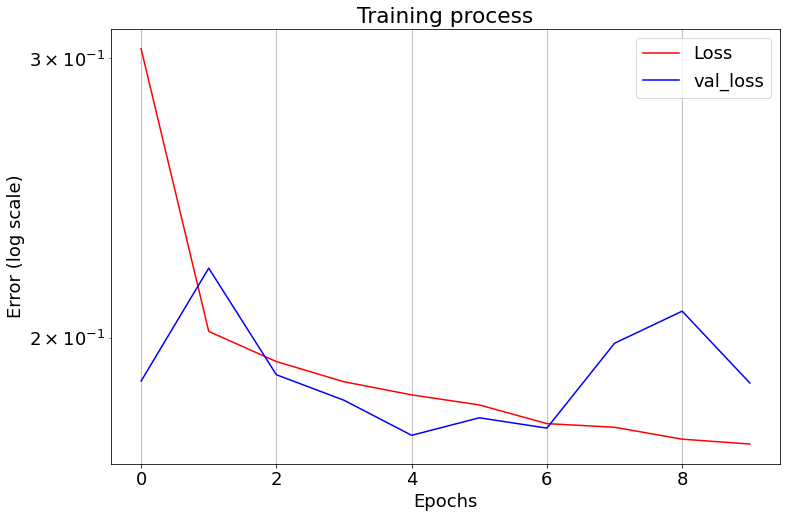

In [31]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # Set the font size of the labels in the plot.

fig = plt.figure( figsize = (12,8) )

plt.title( "Training process" )
plt.plot( history.history["loss"],     "r-", label = "Loss")
plt.plot( history.history["val_loss"], "b-", label = "val_loss")

plt.ylabel("Error (log scale)")
plt.xlabel("Epochs")

# Use log scale for the y-axis.
plt.yscale("log")

plt.grid()
plt.legend()
plt.show()

Again an improvement over the first model

# Finetuning
I think the weighted model works best, so ill try to finetune that one. Due to the imbalanced dataset I need to pick a large enough batch size to include enough samples from both classes. Additionally, i will try to normalize the data.

In [33]:
 from sklearn.model_selection import train_test_split

 x_val_balanced, x_test_balanced, y_val_balanced, y_test_balanced = train_test_split(x_test_balanced, y_test_balanced, test_size=0.5, random_state=42)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_balanced_scaled = scaler.transform(x_val_balanced)
x_test_scaled = scaler.transform(x_test)
x_test_balanced_scaled = scaler.transform(x_test_balanced)

In [35]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

class_weight = {0: w0/100, 1: w1/100} # normalizing the weights to keep the loss function small


model4 = Sequential()
model4.add(Dense(100, activation = "relu", input_shape = x_train.shape[1:]))
#model.add(Dropout(0.70)) 
model4.add(Dense(1000, activation = "relu"))
#model.add(Dropout(0.80)) 
model4.add(Dense(1000, activation = "relu"))
#model.add(Dropout(0.90)) 
model4.add(Dense(1, activation = "sigmoid"))

early_stopping = EarlyStopping(patience = 10, restore_best_weights = True)
model4.compile( loss = "binary_crossentropy", metrics = ["accuracy"] ,optimizer = 'adam')


model4.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1001      
Total params: 1,103,901
Trainable params: 1,103,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model4.fit(x_train_scaled, y_train, epochs = 100, validation_data = (x_val_balanced_scaled, y_val_balanced), class_weight=class_weight, callbacks = [early_stopping], batch_size= 64) # Adding the weights

Epoch 1/100
198/198 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9050 - val_loss: 0.1540 - val_accuracy: 0.9514
Epoch 2/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.9636 - val_loss: 0.1560 - val_accuracy: 0.9535
Epoch 3/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9665 - val_loss: 0.1559 - val_accuracy: 0.9598
Epoch 4/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.9646 - val_loss: 0.1585 - val_accuracy: 0.9598
Epoch 5/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9647 - val_loss: 0.1479 - val_accuracy: 0.9535
Epoch 6/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9648 - val_loss: 0.1461 - val_accuracy: 0.9598
Epoch 7/100
198/198 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.9664 - val_loss: 0.1391 - val_accuracy: 0.9619

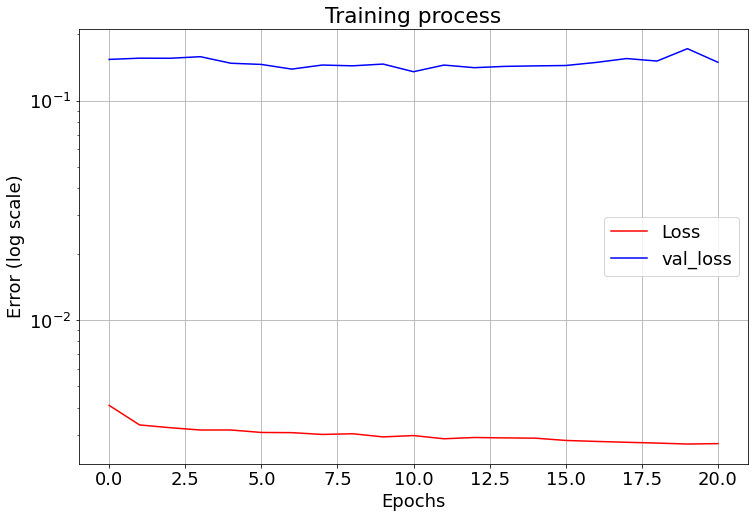

In [37]:
plt.rcParams.update({'font.size': 18}) # Set the font size of the labels in the plot.

fig = plt.figure( figsize = (12,8) )

plt.title( "Training process" )
plt.plot( history.history["loss"],     "r-", label = "Loss")
plt.plot( history.history["val_loss"], "b-", label = "val_loss")

plt.ylabel("Error (log scale)")
plt.xlabel("Epochs")

# Use log scale for the y-axis.
plt.yscale("log")

plt.grid()
plt.legend()
plt.show()

In [38]:
model4.evaluate(x_test_balanced_scaled, y_test_balanced)

15/15 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9577


[0.15341801941394806, 0.957716703414917]

In [67]:
model4.evaluate(x_test_scaled, y_test)

165/165 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9671


[0.14755675196647644, 0.9670789837837219]

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, model4.predict_classes(x_test_scaled))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


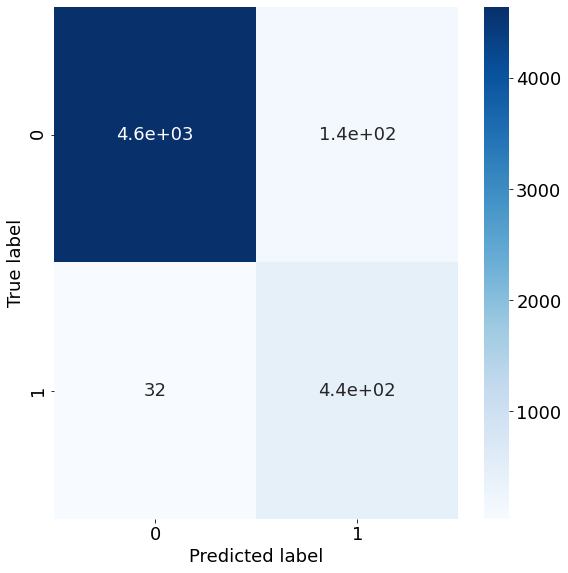

In [69]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()